<h3>Decision Trees Classifier Implementation</h3>

In [41]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#importing dataset
data=pd.read_csv("weather_data.csv")
data=pd.DataFrame(data)
#Cleaning the data
data["Outlook"]=data["Outlook"].str.strip().str.title()
data["Temperature"]=data["Temperature"].str.strip().str.title()
data["Humidity"]=data["Humidity"].str.strip().str.title()
data["Wind"]=data["Wind"].str.strip().str.title()
data.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [9]:
#Encoding the categorical features
data["Temperature"]=data.Temperature.map({"Hot":2,"Mild":1,"Cool":0})
data["Humidity"]=data.Humidity.map({"High":2,"Normal":1})
data["Wind"]=data.Wind.map({"Strong":2,"Weak":1})
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ohe=OneHotEncoder(drop="first")
le=LabelEncoder()
data.Play=le.fit_transform(data.Play)
outlook=ohe.fit_transform(np.array(data["Outlook"]).reshape(-1,1))
outlook=pd.DataFrame(outlook.toarray())
outlook=outlook.rename(columns={0:"Rain",1:"Sunny"})
data=data.drop(columns=["Outlook"])
pd.concat([outlook,data],axis=1)
#Splitting into independent and dependent features
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [67]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
#importing Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
#preprunning
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy","log_loss"],"max_depth":[5,10]}
cv=GridSearchCV(model,params,cv=5)
cv.fit(x_train,y_train)
y_pred=cv.predict(x_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [69]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 5}

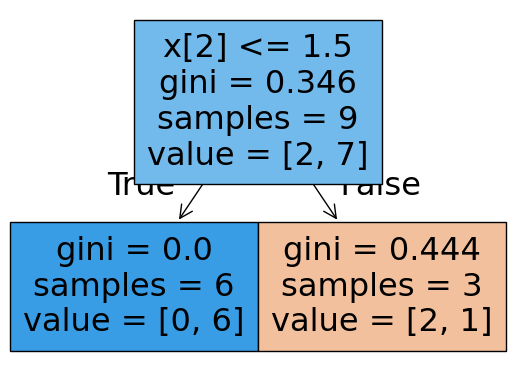

<Figure size 1000x2000 with 0 Axes>

In [71]:
#Plotting the Decision Tree
model=DecisionTreeClassifier(criterion="gini",max_depth=1)
model.fit(x_train,y_train)
from sklearn.tree import plot_tree
plot_tree(model,filled=True)
plt.figure(figsize=(10,20))
plt.show()

In [73]:
#Classification Report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



In [77]:
#We can see the metrics are very poor for this model here as the dataset is too small to train the dataset